# A Visual Understanding of Neural Networks

### Reza Bagheri

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend

## Classification

### Perceptron

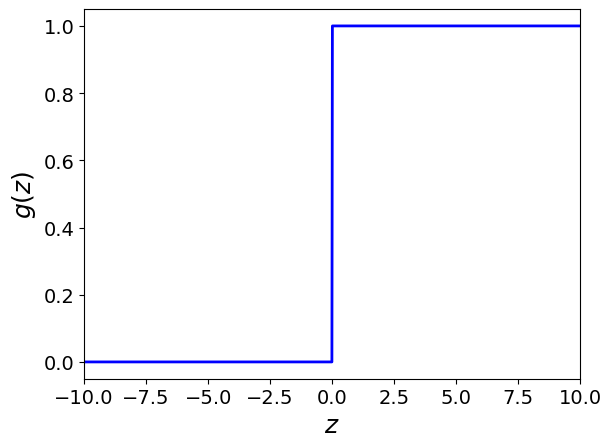

In [11]:
x_array = np.linspace(-10, 10, 1000)
P = np.where(x_array < 0, 0, 1)
plt.plot(x_array, P, color='blue', linewidth=2)
plt.xlim([-10, 10])
plt.ylim([-0.05, 1.05])
plt.xlabel('$z$', fontsize=18)
plt.ylabel('$g(z)$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [12]:
np.random.seed(3)
n = 30
X1 = np.random.randn(n,2)

y1 = np.random.choice((0, 1),size=n)
X1[y1>0,0] -= 4
X1[y1>0,1] += 4
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

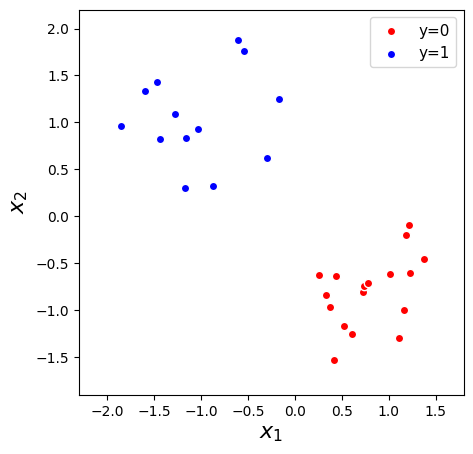

In [13]:
plt.figure(figsize=(5, 5))
marker_colors = ['red', 'blue']
target_labels = np.unique(y1)
n = len(target_labels)
for i, label in enumerate(target_labels):
  plt.scatter(X1[y1==label, 0], X1[y1==label,1], label="y="+str(label),
              edgecolor="white", color=marker_colors[i])
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(loc='best', fontsize=11)
ax = plt.gca()
ax.set_aspect('equal')
plt.xlim([-2.3, 1.8])
plt.ylim([-1.9, 2.2])
plt.show()

In [14]:
class Perceptron(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def fit(self, X, y):

        self.w = np.zeros(1 + X.shape[1])

        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                error = target - self.predict(xi)
                self.w[1:] +=  self.eta * error * xi
                self.w[0] +=  self.eta * error
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [15]:
perc = Perceptron(epochs=150, eta=0.05)
perc.fit(X1, y1)

In [16]:
def plot_boundary(X, y, clf, lims, alpha=1):
    gx1, gx2 = np.meshgrid(np.arange(lims[0], lims[1],
                                    (lims[1]-lims[0])/500.0),
                           np.arange(lims[2], lims[3],
                                    (lims[3]-lims[2])/500.0))
    backgd_colors = ['lightsalmon', 'aqua', 'lightgreen', 'yellow']
    marker_colors = ['red', 'blue', 'green', 'orange']
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx = np.vstack((gx1l,gx2l)).T
    gyhat = clf.predict(gx)
    if len(gyhat.shape)==1:
        gyhat = gyhat.reshape(len(gyhat), 1)
    if gyhat.shape[1] > 1:
        gyhat = gyhat.argmax(axis=1)
    gyhat = gyhat.reshape(gx1.shape)
    target_labels = np.unique(y)
    n = len(target_labels)
    plt.pcolormesh(gx1, gx2, gyhat, cmap=ListedColormap(backgd_colors[:n]))
    for i, label in enumerate(target_labels):
        plt.scatter(X[y==label, 0], X[y==label,1],
                    label="y="+str(label),
                    alpha=alpha, edgecolor="white",
                    color=marker_colors[i])

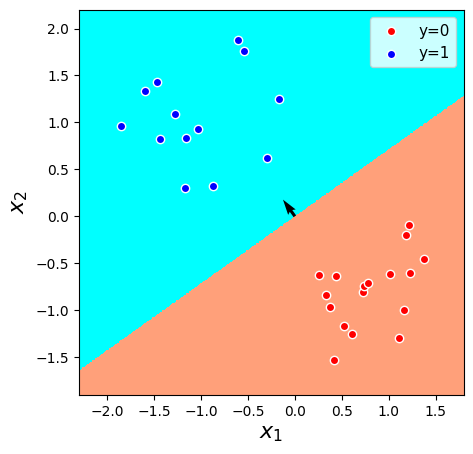

In [17]:
plt.figure(figsize=(5, 5))
# Plot the vector w
plt.quiver([0], [0], perc.w[1], perc.w[2], color=['black'],
           width=0.008, angles='xy', scale_units='xy',
           scale=0.4, zorder=5)
# Plot the boundary
plot_boundary(X1, y1, perc, lims=[-2.3, 1.8, -1.9, 2.2])
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(loc='best', fontsize=11)
plt.xlim([-2.3, 1.8])
plt.ylim([-1.9, 2.2])
plt.show()

### Sigmoid neuron

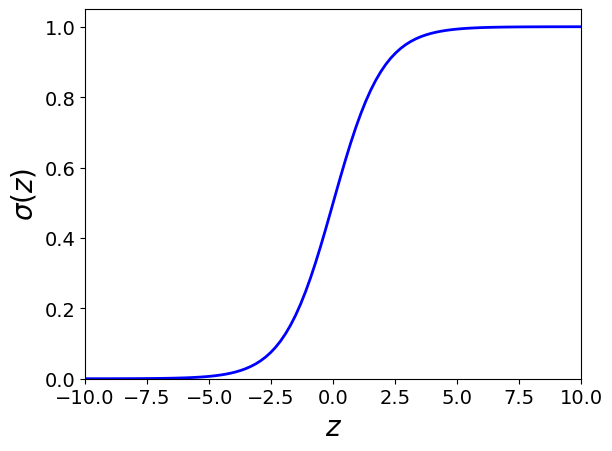

In [18]:
x_array = np.linspace(-10, 10, 100)
P = 1 / (1+np.exp(-x_array))
plt.plot(x_array, P, color='blue', linewidth=2)
plt.xlim([-10, 10])
plt.ylim([0, 1.05])
plt.xlabel('$z$', fontsize=20)
plt.ylabel('$\sigma(z)$', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [19]:
# Fixing the seed for random number generators
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

In [20]:
model1 = Sequential()
model1.add(Dense(1, activation='sigmoid', input_shape=(2,)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model1.compile(loss = 'binary_crossentropy',
               optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
history1 = model1.fit(X1, y1, epochs=1500, verbose=0, batch_size=X1.shape[0])

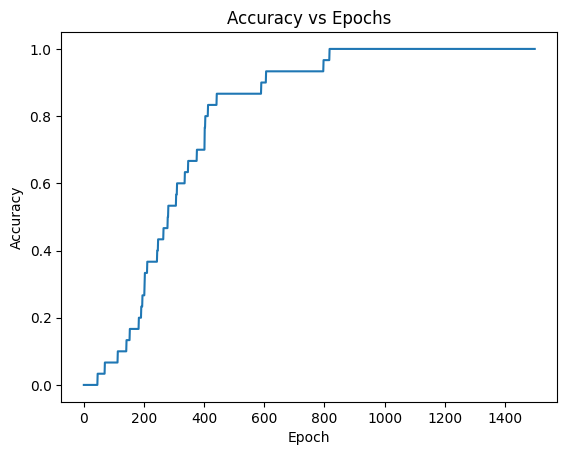

In [23]:
plt.plot(history1.history['accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [24]:
output_layer_weights = model1.layers[0].get_weights()[0]
model1_w1, model1_w2 = output_layer_weights[0, 0], output_layer_weights[1, 0]

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


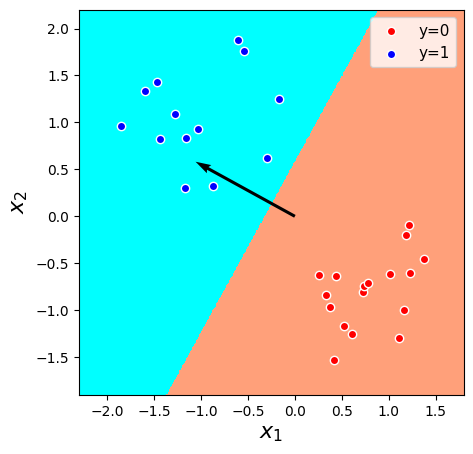

In [25]:
plt.figure(figsize=(5, 5))
# Plot the vector w
output_layer_weights = model1.layers[0].get_weights()[0]
plt.quiver([0], [0], model1_w1,
           model1_w2, color=['black'],
           width=0.008, angles='xy', scale_units='xy',
           scale=1, zorder=5)
# Plot the boundary
plot_boundary(X1, y1, model1, lims=[-2.3, 1.8, -1.9, 2.2])
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(loc='best', fontsize=11)
plt.xlim([-2.3, 1.8])
plt.ylim([-1.9, 2.2])
plt.show()

In [26]:
np.random.seed(0)
xt1 = np.random.randn(50, 3) * 0.4 + np.array([-2, 1, 0])
xt2 = np.random.randn(50, 3) * 0.4 + np.array([1, 4, 3])
y2 = np.array(50*[0]+50*[1])
X2 = np.vstack((xt1, xt2))
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

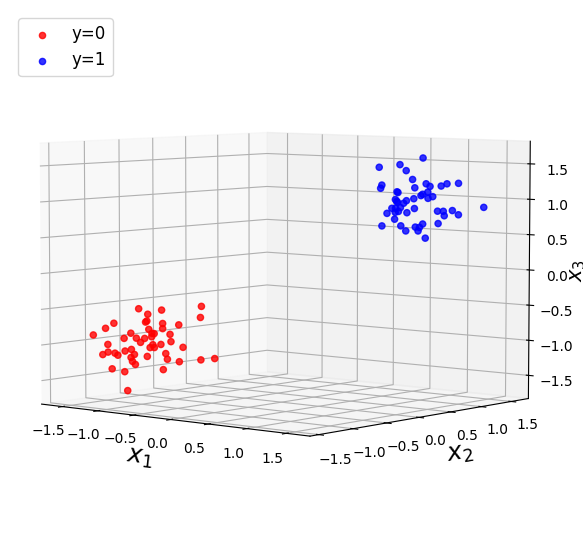

In [27]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X2[y2==0, 0], X2[y2==0,1], X2[y2==0,2],
           label="y=0", alpha=0.8, color="red")
ax.scatter(X2[y2==1, 0], X2[y2==1,1], X2[y2==1,2],
           label="y=1", alpha=0.8, color="blue")
ax.legend(loc="upper left", fontsize=12)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=15, labelpad=-0.5)
ax.view_init(5, -50)
plt.show()

In [28]:
backend.clear_session()

In [29]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

In [30]:
model2 = Sequential()
model2.add(Dense(1, activation='sigmoid', input_shape=(3,)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model2.compile(loss = 'binary_crossentropy',
               optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
history2 = model2.fit(X2, y2, epochs=1500, verbose=0,
                      batch_size=X2.shape[0])

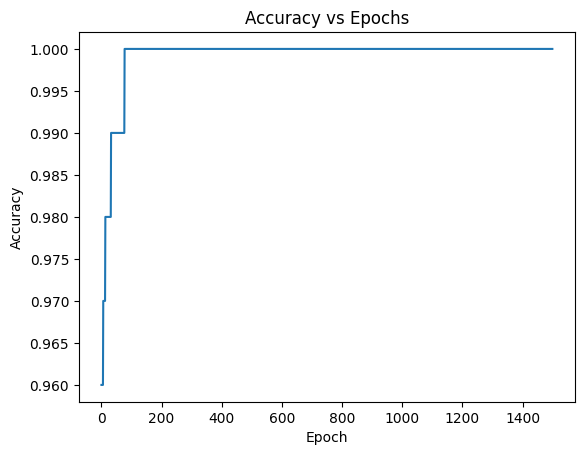

In [33]:
plt.plot(history2.history['accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [34]:
output_layer_weights = model2.layers[-1].get_weights()[0]
output_layer_biases = model2.layers[-1].get_weights()[1]

In [35]:
model2_w0 = output_layer_biases[0]
model2_w1,  model2_w2,  model2_w3 = output_layer_weights[0, 0], \
      output_layer_weights[1, 0], output_layer_weights[2, 0]

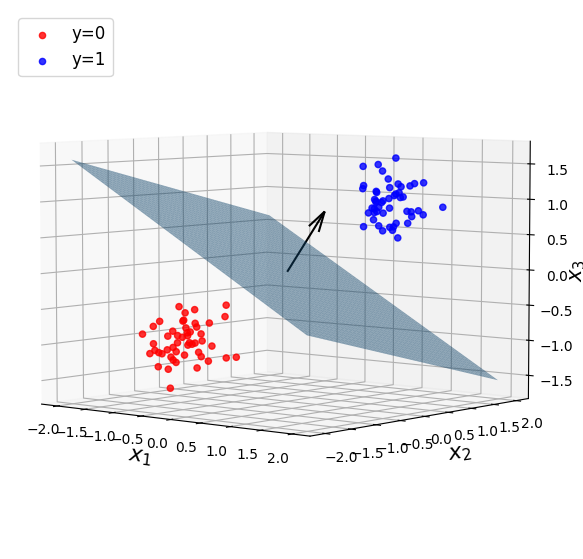

In [36]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

lims=[-2, 2, -2, 2]
ga1, ga2 = np.meshgrid(np.arange(lims[0], lims[1], (lims[1]-lims[0])/500.0),
                       np.arange(lims[2], lims[3], (lims[3]-lims[2])/500.0))

ga1l = ga1.flatten()
ga2l = ga2.flatten()
ga3 = -(model2_w0 + model2_w1*ga1l + model2_w2*ga2l) / model2_w3
ga3 = ga3.reshape(500, 500)
ax.plot_surface(ga1, ga2, ga3, alpha=0.5)
ax.quiver([0], [0], [0], model2_w1, model2_w2, model2_w3,
          color=['black'], length=0.5, zorder=5)
ax.scatter(X2[y2==0, 0], X2[y2==0,1], X2[y2==0,2],
           label="y=0", alpha=0.8, color="red")
ax.scatter(X2[y2==1, 0], X2[y2==1,1], X2[y2==1,2],
           label="y=1", alpha=0.8, color="blue")
ax.legend(loc="upper left", fontsize=12)
ax.set_xlabel("$x_1$", fontsize=16)
ax.set_ylabel("$x_2$", fontsize=16)
ax.set_zlabel("$x_3$", fontsize=15, labelpad=-0.5)
ax.view_init(5, -50)
plt.show()

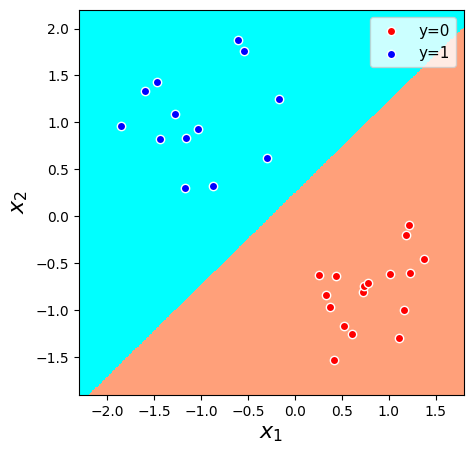

In [37]:
# Comparing with a logistic regression model
lr_model = LogisticRegression().fit(X1, y1)

plt.figure(figsize=(5, 5))
# Plot the boundary
plot_boundary(X1, y1, lr_model, lims=[-2.3, 1.8, -1.9, 2.2])
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(loc='best', fontsize=11)
plt.xlim([-2.3, 1.8])
plt.ylim([-1.9, 2.2])
plt.show()

### Softmax layer

In [ ]:
np.random.seed(0)
xt1 = np.random.randn(50, 2) * 0.4 + np.array([2, 1])
xt2 = np.random.randn(50, 2) * 0.7 + np.array([6, 4])
xt3 = np.random.randn(50, 2) * 0.5 + np.array([2, 6])

y3 = np.array(50*[0]+50*[1]+50*[2])
X3 = np.vstack((xt1, xt2, xt3))
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)

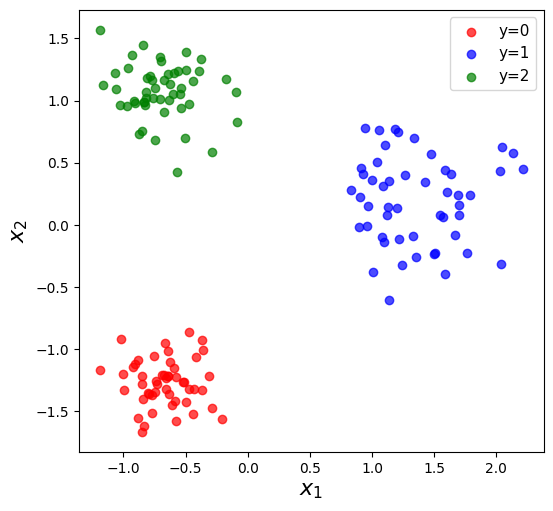

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X3[y3==0, 0], X3[y3==0,1], label="y=0", alpha=0.7, color="red")
plt.scatter(X3[y3==1, 0], X3[y3==1,1], label="y=1", alpha=0.7, color="blue")
plt.scatter(X3[y3==2, 0], X3[y3==2,1], label="y=2", alpha=0.7, color="green")
plt.legend(loc="best", fontsize=11)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

In [ ]:
backend.clear_session()

In [ ]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)
y3_categorical = to_categorical(y3, num_classes=3)

In [ ]:
model3 = Sequential()
model3.add(Dense(3, activation='softmax', input_shape=(2,)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model3.compile(loss = 'categorical_crossentropy',
               optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history3 = model3.fit(X3, y3_categorical, epochs=2200,
                      verbose=0, batch_size=X3.shape[0])

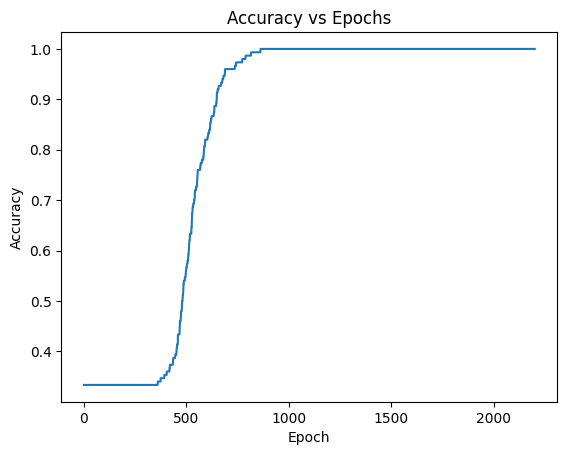

In [ ]:
plt.plot(history3.history['accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
output_layer_weights = model3.layers[-1].get_weights()[0]
output_layer_biases = model3.layers[-1].get_weights()[1]

In [ ]:
model3_w10, model3_w20, model3_w30 = output_layer_biases[0], \
output_layer_biases[1], output_layer_biases[2]

model3_w1 = output_layer_weights[:, 0]
model3_w2 = output_layer_weights[:, 1]
model3_w3 = output_layer_weights[:, 2]

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


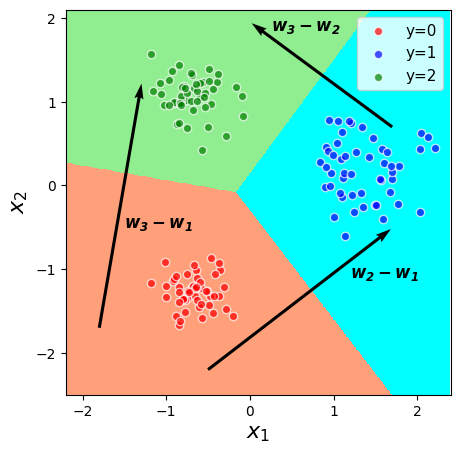

In [ ]:
plt.figure(figsize=(5, 5))
plt.quiver([1.7], [0.7], model3_w3[0]-model3_w2[0],
           model3_w3[1]-model3_w2[1], color=['black'],
           width=0.008, angles='xy', scale_units='xy',
           scale=1, zorder=5)
plt.quiver([-0.5], [-2.2], model3_w2[0]-model3_w1[0],
           model3_w2[1]-model3_w1[1], color=['black'],
           width=0.008, angles='xy', scale_units='xy',
           scale=1, zorder=5)
plt.quiver([-1.8], [-1.7], model3_w3[0]-model3_w1[0],
           model3_w3[1]-model3_w1[1], color=['black'],
           width=0.008, angles='xy', scale_units='xy',
           scale=1, zorder=5)
plt.text(0.25, 1.85, "$\mathregular{w_3-w_2}$", color="black",
         fontsize=12, weight="bold", style="italic")
plt.text(1.2, -1.1, "$\mathregular{w_2-w_1}$", color="black",
         fontsize=12, weight="bold", style="italic")
plt.text(-1.5, -0.5, "$\mathregular{w_3-w_1}$", color="black",
         fontsize=12, weight="bold", style="italic")
plot_boundary(X3, y3, model3,lims=[-2.2, 2.4, -2.5, 2.1],
              alpha= 0.7)
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(loc='best', fontsize=11)
plt.xlim([-2.2, 2.4])
plt.ylim([-2.5, 2.1])
plt.show()

### Multiple-layer networks

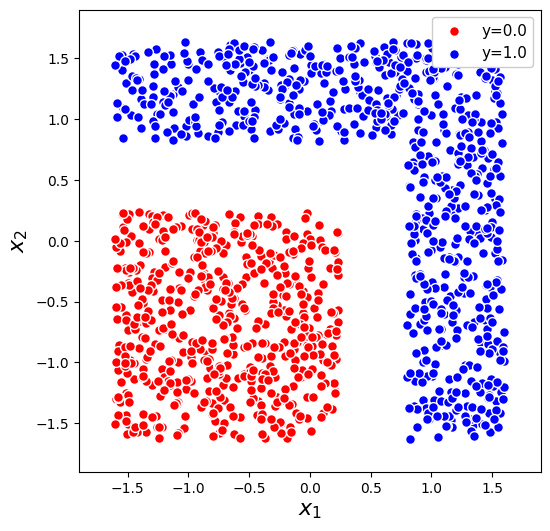

In [ ]:
np.random.seed(0)
n = 1550
Xt1 = np.random.uniform(low=[0, 0], high=[4, 4], size=(n,2))
drop = (Xt1[:, 0] < 3) & (Xt1[:, 1] < 3)
Xt1 = Xt1[~drop]
yt1= np.ones(len(Xt1))

Xt2 = np.random.uniform(low=[0, 0], high=[4, 4], size=(n,2))
drop = (Xt2[:, 0] > 2.3) | (Xt2[:, 1] > 2.3)

Xt2 = Xt2[~drop]
yt2= np.zeros(len(Xt2))

X4 = np.concatenate([Xt1, Xt2])
y4 = np.concatenate([yt1, yt2])

scaler = StandardScaler()
X4 = scaler.fit_transform(X4)

colors = ['red', 'blue']
plt.figure(figsize=(6, 6))
for i in np.unique(y4):
    plt.scatter(X4[y4==i, 0], X4[y4==i, 1], label = "y="+str(i),
                color=colors[int(i)], edgecolor="white", s=50)

plt.xlim([-1.9, 1.9])
plt.ylim([-1.9, 1.9])
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(loc='upper right', fontsize=11, framealpha=1)
plt.show()

In [ ]:
backend.clear_session()

In [ ]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

In [ ]:
model4 = Sequential()
model4.add(Dense(1, activation='sigmoid', input_shape=(2,)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model4.compile(loss = 'binary_crossentropy',
               optimizer='adam', metrics=['accuracy'])
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history4 = model4.fit(X4, y4, epochs=4000, verbose=0,
                      batch_size=X4.shape[0])

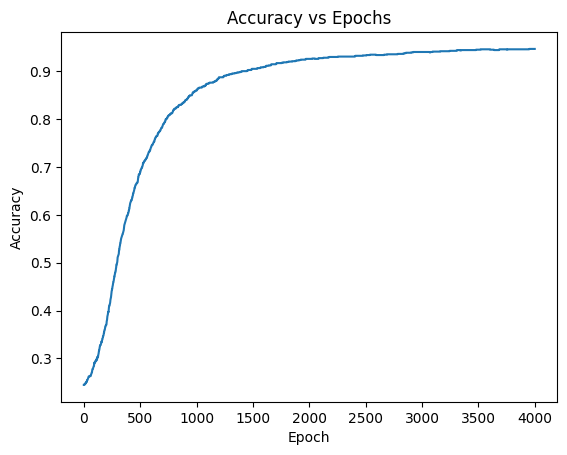

In [ ]:
plt.plot(history4.history['accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


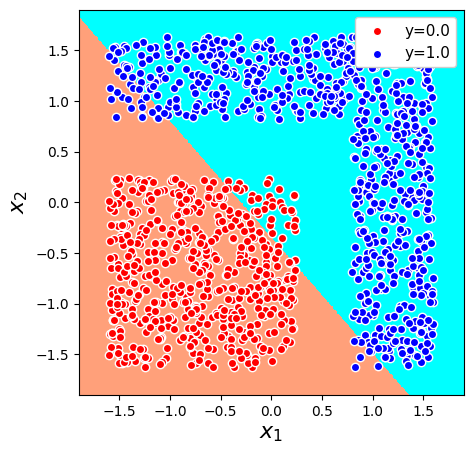

In [ ]:
plt.figure(figsize=(5,5))
plot_boundary(X4, y4, model4, lims=[-2, 2, -2, 2])
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(loc='upper right', fontsize=11, framealpha=1)
plt.xlim([-1.9, 1.9])
plt.ylim([-1.9, 1.9])
plt.show()

In [ ]:
backend.clear_session()

In [ ]:
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
input_layer = Input(shape=(2,))
hidden_layer = Dense(3, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)
model5 = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model5.compile(loss = 'binary_crossentropy', optimizer='adam',
               metrics=['accuracy'])
model5.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history5 = model5.fit(X4, y4, epochs=2200, verbose=0,
                      batch_size=X4.shape[0])

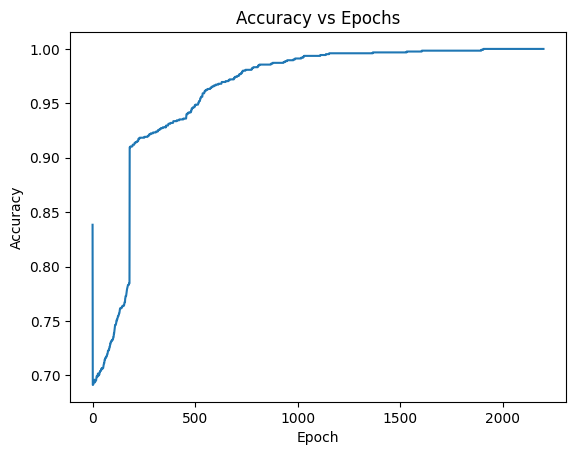

In [ ]:
plt.plot(history5.history['accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


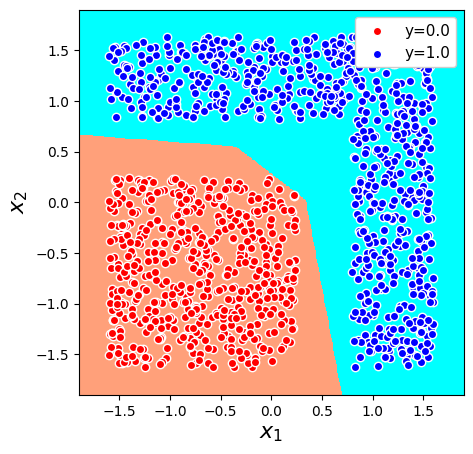

In [ ]:
plt.figure(figsize=(5,5))
plot_boundary(X4, y4, model5, lims=[-2, 2, -2, 2])
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(loc='upper right', fontsize=11, framealpha=1)
plt.xlim([-1.9, 1.9])
plt.ylim([-1.9, 1.9])
plt.show()

In [ ]:
hidden_layer_model = Model(inputs=model5.input,
                           outputs=model5.layers[1].output)
hidden_layer_output = hidden_layer_model.predict(X4)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
output_layer_weights = model5.layers[-1].get_weights()[0]
output_layer_biases = model5.layers[-1].get_weights()[1]

In [ ]:
 w0 = output_layer_biases[0]
 w1, w2, w3= output_layer_weights[0, 0], \
  output_layer_weights[1, 0], output_layer_weights[2, 0]

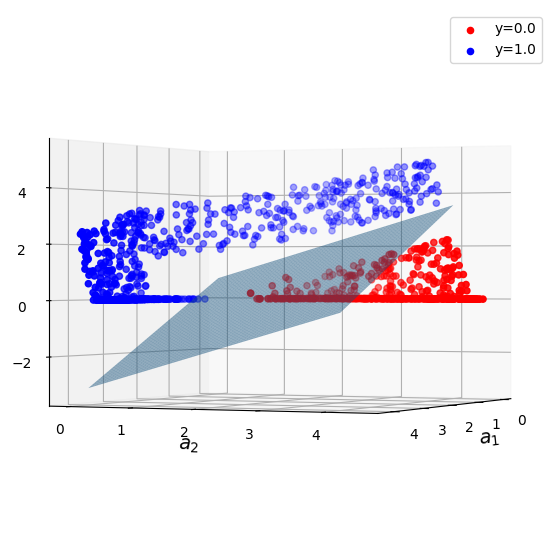

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
# Plot the bounday
lims=[0, 4, 0, 4]
ga1, ga2 = np.meshgrid(np.arange(lims[0], lims[1], (lims[1]-lims[0])/500.0),
                       np.arange(lims[2], lims[3], (lims[3]-lims[2])/500.0))

ga1l = ga1.flatten()
ga2l = ga2.flatten()
ga3 = (0.5 - (w0 + w1*ga1l + w2*ga2l)) / w3
ga3 = ga3.reshape(500, 500)
ax.plot_surface(ga1, ga2, ga3, alpha=0.5)

marker_colors = ['red', 'blue']
target_labels = np.unique(y4)
n = len(target_labels)
for i, label in enumerate(target_labels):
    ax.scatter(hidden_layer_output[y4==label, 0],
              hidden_layer_output[y4==label, 1],
              hidden_layer_output[y4==label, 2],
              label="y="+str(label),
              color=marker_colors[i])

ax.view_init(0, 25)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$a_3$', fontsize=14)
ax.legend(loc="best")
plt.show()

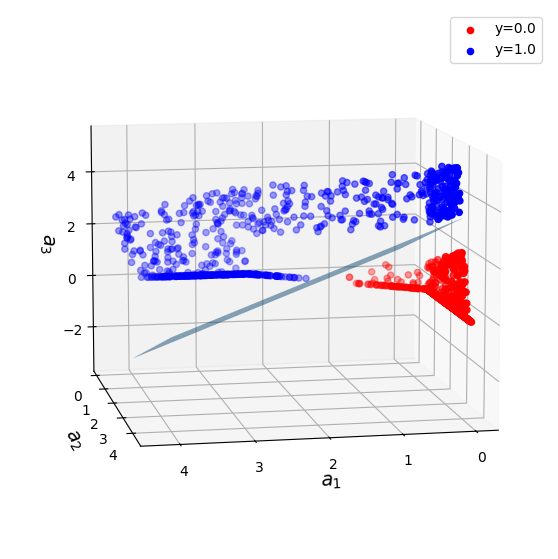

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
# Plot the bounday
lims=[0, 4, 0, 4]
ga1, ga2 = np.meshgrid(np.arange(lims[0], lims[1], (lims[1]-lims[0])/500.0),
                       np.arange(lims[2], lims[3], (lims[3]-lims[2])/500.0))

ga1l = ga1.flatten()
ga2l = ga2.flatten()
ga3 = (0.5 - (w0 + w1*ga1l + w2*ga2l)) / w3
ga3 = ga3.reshape(500, 500)
ax.plot_surface(ga1, ga2, ga3, alpha=0.6)


marker_colors = ['red', 'blue']
target_labels = np.unique(y4)
n = len(target_labels)
for i, label in enumerate(target_labels):
    ax.scatter(hidden_layer_output[y4==label, 0],
               hidden_layer_output[y4==label, 1],
               hidden_layer_output[y4==label, 2], label="y="+str(label),
               color=marker_colors[i])

ax.view_init(10, 79)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$a_3$', fontsize=14)
ax.legend(loc="best")
plt.show()

In [ ]:
backend.clear_session()

In [ ]:
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
input_layer = Input(shape=(2,))
hidden_layer_linear = Dense(3, activation='linear')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_linear)
model6 = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model6.compile(loss = 'binary_crossentropy',
               optimizer='adam', metrics=['accuracy'])
model6.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history6 = model6.fit(X4, y4, epochs=1000, verbose=0,
                      batch_size=X4.shape[0])

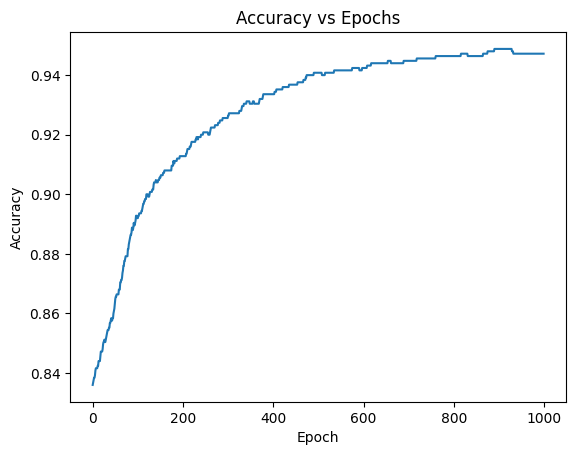

In [ ]:
plt.plot(history6.history['accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


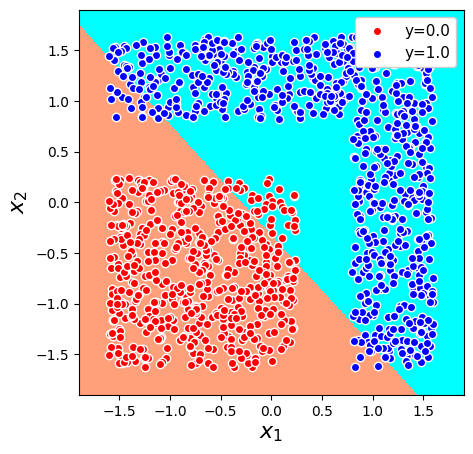

In [ ]:
plt.figure(figsize=(5,5))
plot_boundary(X4, y4, model6, lims=[-2, 2, -2, 2])
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(loc='upper right', fontsize=11, framealpha=1)
plt.xlim([-1.9, 1.9])
plt.ylim([-1.9, 1.9])
plt.show()

In [ ]:
hidden_layer_model = Model(inputs=model6.input,
                           outputs=model6.layers[1].output)
hidden_layer_output = hidden_layer_model.predict(X4)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
hidden_layer_weights = model6.layers[1].get_weights()[0]
output_layer_weights = model6.layers[-1].get_weights()[0]
output_layer_biases = model6.layers[-1].get_weights()[1]

In [ ]:
 w0 = output_layer_biases[0]
 w1, w2, w3= output_layer_weights[0, 0], \
  output_layer_weights[1, 0], output_layer_weights[2, 0]

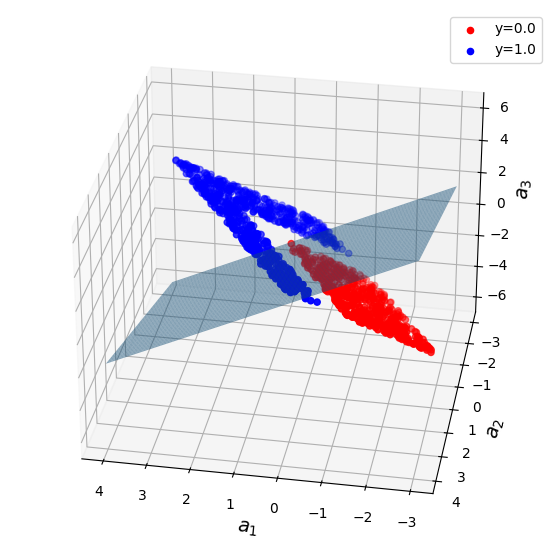

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
# Plot the bounday
lims=[-3, 4, -3, 4]
ga1, ga2 = np.meshgrid(np.arange(lims[0], lims[1], (lims[1]-lims[0])/500.0),
                       np.arange(lims[2], lims[3], (lims[3]-lims[2])/500.0))

ga1l = ga1.flatten()
ga2l = ga2.flatten()
ga3 = (0.5 - (w0 + w1*ga1l + w2*ga2l)) / w3
ga3 = ga3.reshape(500, 500)
ax.plot_surface(ga1, ga2, ga3, alpha=0.5)


marker_colors = ['red', 'blue']
target_labels = np.unique(y4)
n = len(target_labels)
for i, label in enumerate(target_labels):
    ax.scatter(hidden_layer_output[y4==label, 0],
              hidden_layer_output[y4==label, 1],
              hidden_layer_output[y4==label, 2],
              label="y="+str(label),
              color=marker_colors[i])

ax.view_init(30, 100)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$a_3$', fontsize=14)
ax.legend(loc="best")
plt.show()

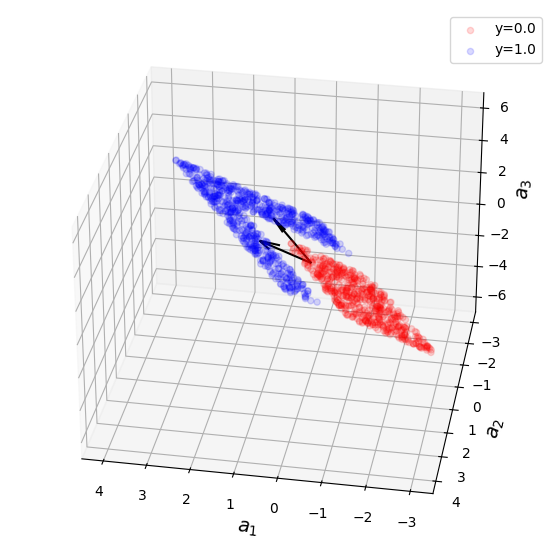

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
# Plot the bounday
lims=[-3, 4, -3, 4]
ga1, ga2 = np.meshgrid(np.arange(lims[0], lims[1], (lims[1]-lims[0])/500.0),
                       np.arange(lims[2], lims[3], (lims[3]-lims[2])/500.0))

ga1l = ga1.flatten()
ga2l = ga2.flatten()
ga3 = (0.5 - (w0 + w1*ga1l + w2*ga2l)) / w3
ga3 = ga3.reshape(500, 500)
ax.plot_surface(ga1, ga2, ga3, alpha=0)


marker_colors = ['red', 'blue']
target_labels = np.unique(y4)
n = len(target_labels)
for i, label in enumerate(target_labels):
    ax.scatter(hidden_layer_output[y4==label, 0],
              hidden_layer_output[y4==label, 1],
              hidden_layer_output[y4==label, 2],
              label="y="+str(label),
              color=marker_colors[i], alpha=0.15)

ax.quiver([0], [0], [0], hidden_layer_weights[0,0],
          hidden_layer_weights[0,1], hidden_layer_weights[0,2],
          color=['black'], length=1.1, zorder=15)
ax.quiver([0], [0], [0], hidden_layer_weights[1,0],
          hidden_layer_weights[1,1], hidden_layer_weights[1,2],
          color=['black'], length=1.1, zorder=15)

ax.view_init(30, 100)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$a_3$', fontsize=14)
ax.legend(loc="best")
plt.show()

## Regression

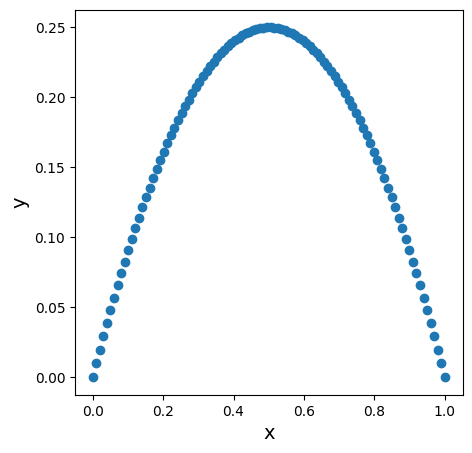

In [ ]:
np.random.seed(0)
num_points = 100
X5 = np.linspace(0,1, num_points)
y5 = -(X5-0.5)**2 + 0.25

fig = plt.figure(figsize=(5, 5))
plt.scatter(X5, y5)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

In [ ]:
backend.clear_session()
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

In [ ]:
model6 = Sequential()
model6.add(Dense(1, activation='linear', input_shape=(1,)))
model6.compile(optimizer='adam', loss='mse', metrics=['mse'])
model6.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history7 = model6.fit(X5, y5, epochs=500, verbose=0,
                      batch_size=X5.shape[0])

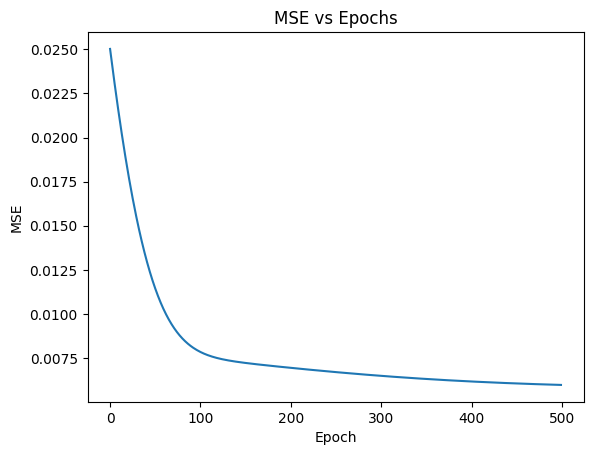

In [ ]:
plt.plot(history7.history['mse'])
plt.title('MSE vs Epochs')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

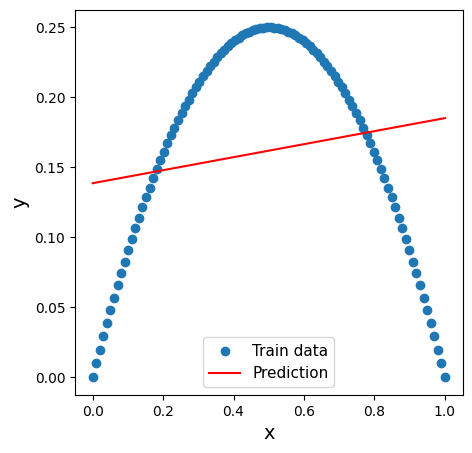

In [ ]:
X5_test = np.linspace(0, 1, 1000)
yhat1 = model6.predict(X5_test)

fig = plt.figure(figsize=(5, 5))
plt.scatter(X5, y5, label="Train data")
plt.plot(X5_test, yhat1, color="red", label="Prediction")
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc="best", fontsize=11)
plt.show()

In [ ]:
backend.clear_session()
np.random.seed(15)
random.seed(15)
tf.random.set_seed(15)

In [ ]:
input_layer = Input(shape=(1,))
x = Dense(10, activation='relu')(input_layer)
output_layer = Dense(1, activation='linear')(x)
model7 = Model(inputs=input_layer, outputs=output_layer)

model7.compile(optimizer='adam', loss='mse', metrics=['mse'])
model7.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history8 = model7.fit(X5, y5, epochs=1500, verbose=0,
                      batch_size=X5.shape[0])

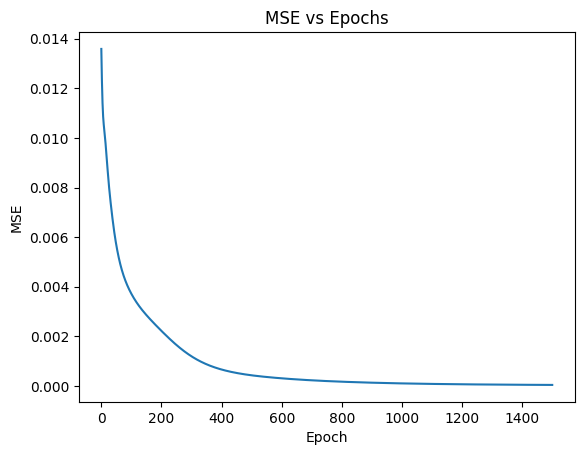

In [ ]:
plt.plot(history8.history['mse'])
plt.title('MSE vs Epochs')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


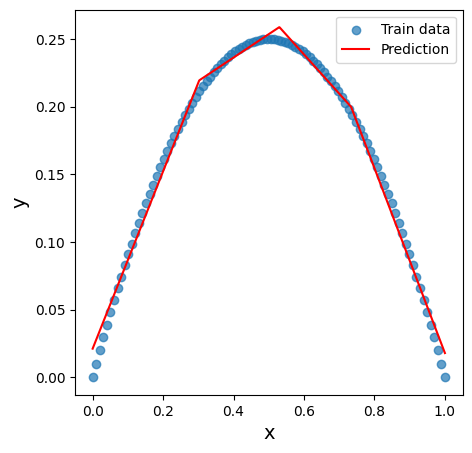

In [ ]:
X5_test = np.linspace(0,1, 1000)
yhat2 = model7.predict(X5_test)

fig = plt.figure(figsize=(5, 5))
plt.scatter(X5, y5, label="Train data", alpha=0.7)
plt.plot(X5_test, yhat2, color="red", label="Prediction")
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc="best", fontsize=10)
plt.show()

In [ ]:
# Define a new model to get the output of the first layer
hidden_layer_model = Model(inputs=model7.input,
                           outputs=model7.layers[1].output)
hidden_layer_output = hidden_layer_model.predict(X5_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
output_layer_weights = model7.layers[-1].get_weights()[0]
output_layer_biases = model7.layers[-1].get_weights()[1]

In [ ]:
hidden_layer_weights = model7.layers[1].get_weights()[0]
hidden_layer_biases = model7.layers[1].get_weights()[1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

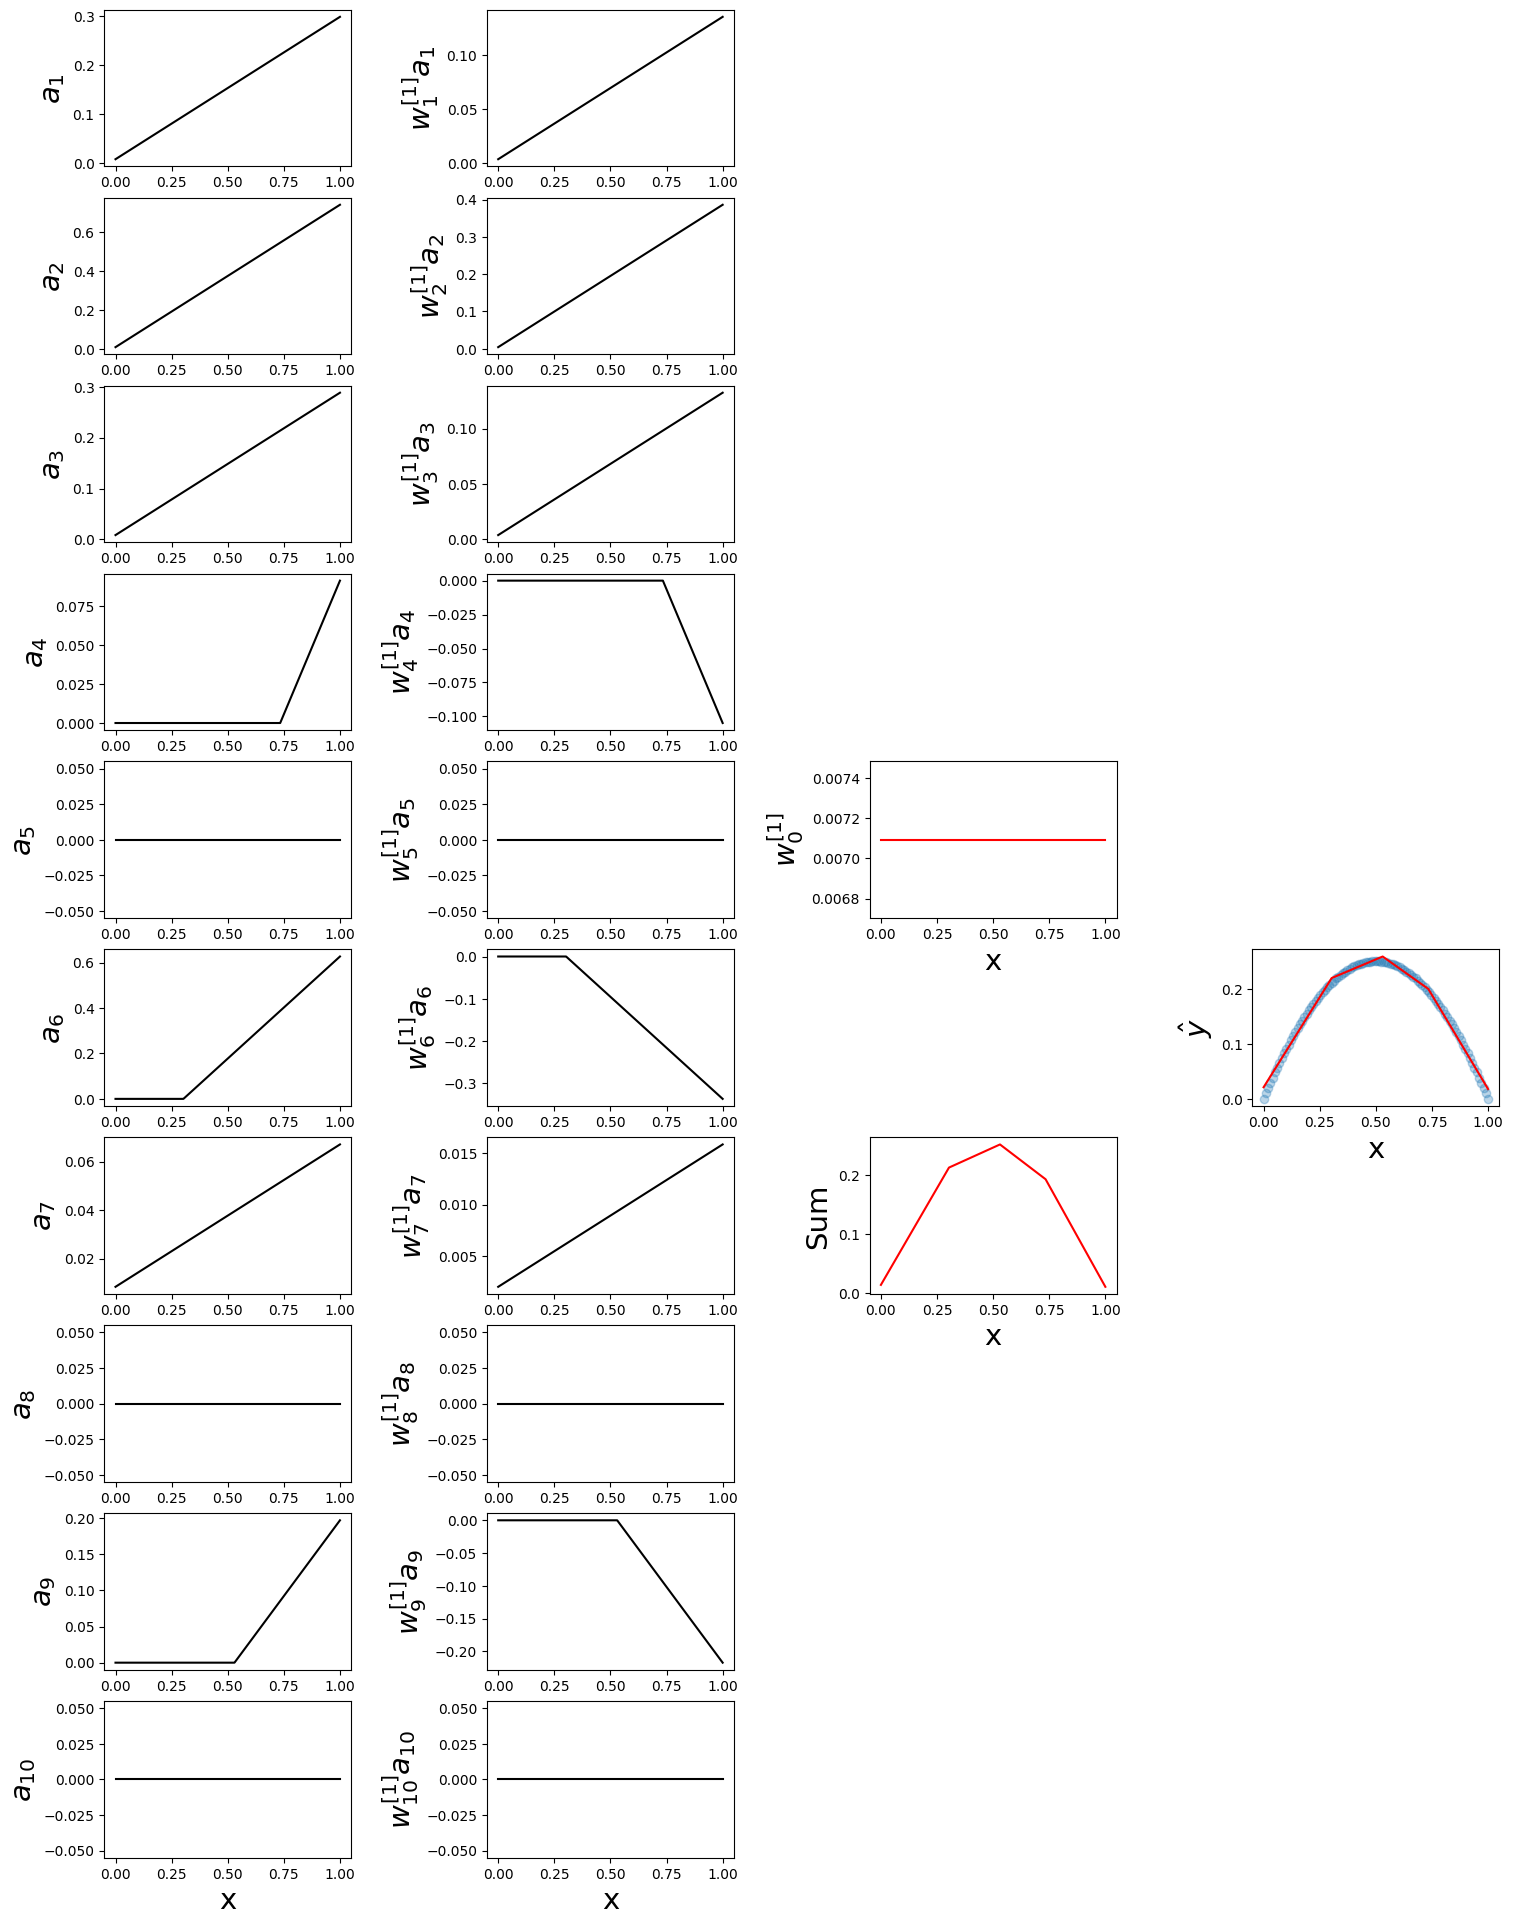

In [ ]:
fig, axs = plt.subplots(10, 4, figsize=(18, 24))
plt.subplots_adjust(wspace=0.55, hspace=0.2)

for i in range(10):
    axs[i, 0].plot(X5_test, hidden_layer_output[:, i], color="black")
    axs[i, 1].plot(X5_test,
                  hidden_layer_output[:, i]*output_layer_weights[i],
                  color="black")
    axs[i, 0].set_ylabel(r'$a_{%d}$' % (i+1), fontsize=21)
    axs[i, 1].set_ylabel(r'$w^{[1]}_{%d}a_{%d}$' % (i+1, i+1), fontsize=21)
    axs[i, 2].axis('off')
    axs[i, 3].axis('off')
axs[i, 0].set_xlabel("x", fontsize=21)
axs[i, 1].set_xlabel("x", fontsize=21)

axs[4, 2].axis('on')
axs[6, 2].axis('on')
axs[4, 2].plot(X5_test, [output_layer_biases]*len(X5_test),
               color="red")
axs[6, 2].plot(X5_test,
               (hidden_layer_output*output_layer_weights.T).sum(axis=1),
               color="red")
axs[6, 2].set_xlabel("x", fontsize=21)
axs[4, 2].set_ylabel("$w^{[1]}_0$", fontsize=21)
axs[4, 2].set_xlabel("x", fontsize=21)
axs[6, 2].set_ylabel("Sum", fontsize=21)
axs[5, 3].axis('on')
axs[5, 3].scatter(X5, y5, alpha=0.3)
axs[5, 3].plot(X5_test, yhat2, color="red")
axs[5, 3].set_xlabel("x", fontsize=21)
axs[5, 3].set_ylabel("$\hat{y}$", fontsize=21)
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

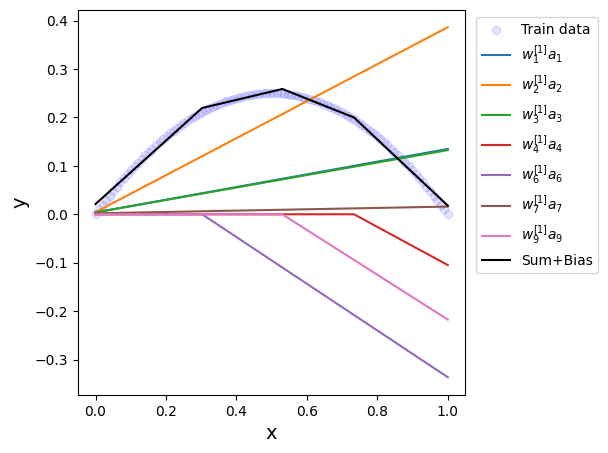

In [ ]:
X5_test = np.linspace(0,1, 1000)
yhat2 = model7.predict(X5_test)

fig = plt.figure(figsize=(5, 5))
plt.scatter(X5, y5, alpha=0.1, color="blue",
            label="Train data")

for i in range(10):
    if np.any(hidden_layer_output[:, i]):
        plt.plot(X5_test,
                hidden_layer_output[:, i]*output_layer_weights[i],
                label=r'$w^{[1]}_{%d}a_{%d}$' % (i+1, i+1))
plt.plot(X5_test, yhat2,
         color="black", label="Sum+Bias")

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc="best", fontsize=10,
           bbox_to_anchor=(1.01, 1.0))
fig.savefig("fig36.png", dpi=300, bbox_inches="tight")
files.download("fig36.png")
plt.show()

In [ ]:
backend.clear_session()
np.random.seed(15)
random.seed(15)
tf.random.set_seed(15)

In [ ]:
input_layer = Input(shape=(1,))
x = Dense(400, activation='relu')(input_layer)
output_layer = Dense(1, activation='linear')(x)
model7 = Model(inputs=input_layer, outputs=output_layer)

model7.compile(optimizer='adam', loss='mse', metrics=['mse'])
model7.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 400)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history8 = model7.fit(X5, y5, epochs=1500, verbose=0,
                      batch_size=X5.shape[0])

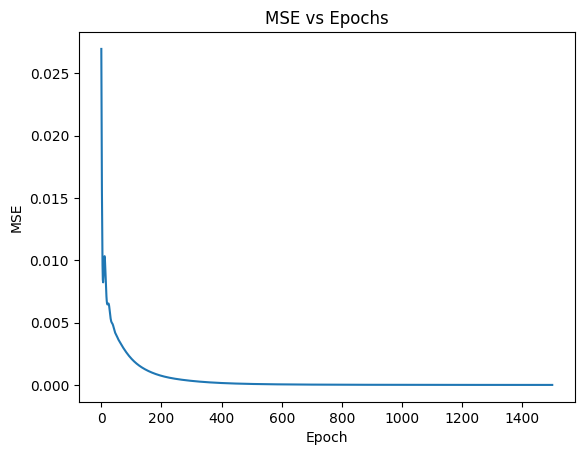

In [ ]:
plt.plot(history8.history['mse'])
plt.title('MSE vs Epochs')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

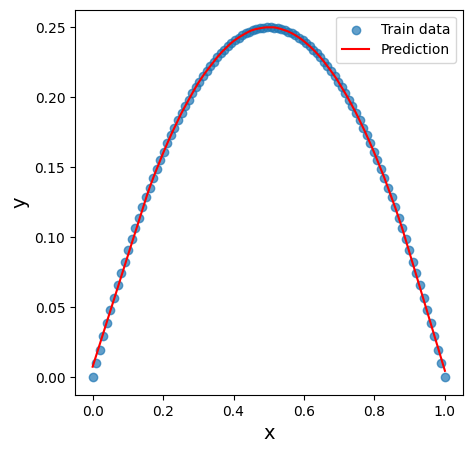

In [ ]:
X5_test = np.linspace(0,1, 1000)
yhat2 = model7.predict(X5_test)

fig = plt.figure(figsize=(5, 5))
plt.scatter(X5, y5, label="Train data", alpha=0.7)
plt.plot(X5_test, yhat2, color="red", label="Prediction")
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc="best", fontsize=10)
plt.show()